#Final Project
Sali Mallat / 20040127 <br>
Advanced Coding 3: Exploring Machine Intelligence <br>
<hr>

<b> Code Credits </b><br>
[1] This Notebook was created by Jun-Yan Zhu and modified by me <br>
Link to Original Github Repo: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

[2] Other external code is creditted through out this notebook

# Install

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/"
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

/content/drive/MyDrive
fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676 kB 983 kB/s 
     |████████████████████████████████| 1.8 MB 25.0 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 181 kB 46.4 MB/s 
     |████████████████████████████████| 145 kB 49.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=ab2d62fe0929ac2b30e908ed99dbc1548ca434b6734d25f46c6933537bfb9e18
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=49d47802d7c10b9c4bd9ac4d61ecbfee30704917acd64a5bb408c1e516d650c2
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
  Created wheel for torchfile: filen

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
#if you manually uploaded your dataset to Colab, unzip it
zip_path = "/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R.zip"

!unzip {zip_path} -d /content/

Archive:  /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R.zip
   creating: /content/CycleGAN_Dataset_R/
  inflating: /content/CycleGAN_Dataset_R/.DS_Store  
  inflating: /content/__MACOSX/CycleGAN_Dataset_R/._.DS_Store  
   creating: /content/CycleGAN_Dataset_R/testA/
   creating: /content/CycleGAN_Dataset_R/trainB/
   creating: /content/CycleGAN_Dataset_R/testB/
   creating: /content/CycleGAN_Dataset_R/trainA/
  inflating: /content/CycleGAN_Dataset_R/testA/.DS_Store  
  inflating: /content/__MACOSX/CycleGAN_Dataset_R/testA/._.DS_Store  
  inflating: /content/CycleGAN_Dataset_R/testA/fakes000117.jpg  
  inflating: /content/__MACOSX/CycleGAN_Dataset_R/testA/._fakes000117.jpg  
  inflating: /content/CycleGAN_Dataset_R/testA/fakes000116.jpg  
  inflating: /content/__MACOSX/CycleGAN_Dataset_R/testA/._fakes000116.jpg  
  inflating: /content/CycleGAN_Dataset_R/testA/fakes000114.jpg  
  inflating: /content/__MACOSX/CycleGAN_Dataset_R/testA/._fakes000114.jpg  
 

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2022-06-16 12:13:55--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

       ./checkpoint   1%[                    ] 870.35K  1.03MB/s               ^C


In [ ]:
!bash --help

GNU bash, version 4.4.20(1)-release-(x86_64-pc-linux-gnu)
Usage:	bash [GNU long option] [option] ...
	bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option
Type `bash -c "help set"' for more information about shell options.
Type `bash -c help' for more information about shell builtin commands.
Use the `bashbug' command to report bugs.

bash home page: <http://www.gnu.org/software/bash>
General help using GNU software: <http://www.gnu.org/gethelp/>


# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
#Training for styleTransfer01 / styleTransfer02 / styleTransfer03
#Dataset: CycleGAN_Dataset_R

!python train.py --dataroot ./datasets/CycleGAN_Dataset_R --name styleTransfer01 --model cycle_gan --n_epochs 120

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/CycleGAN_Dataset_R 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
#styleTransfer01
#Rename 40_net_G_B.pth ---> latest_net_G.pth
#moved to styleTransfer10

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testA --name styleTransfer01 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

In [ ]:
#styleTransfer02
#Rename 40_net_G_A.pth ---> latest_net_G.pth
#moved to styleTransfer10

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testA --name styleTransfer02 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

In [ ]:
#styleTransfer03
#Rename latest_net_G_A.pth ---> latest_net_G.pth

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testA --name styleTransfer03 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

In [ ]:
#styleTransfer04
#Rename 10_net_G_A.pth ---> latest_net_G.pth

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testA --name styleTransfer04 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

In [ ]:
#styleTransfer05
#Rename 100_net_G_A.pth ---> latest_net_G.pth

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testA --name styleTransfer05 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

In [ ]:
#styleTransfer05-1
#Testing on a different dataset: CycleGAN_Dataset_DF
#Rename 100_net_G_A.pth ---> latest_net_G.pth

!python test.py --dataroot datasets/CycleGAN_Dataset_DF/testA --name styleTransfer051 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_DF/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                        

In [ ]:
#styleTransfer06
#Rename 95_net_G_A.pth ---> latest_net_G.pth
##dataroot is testB

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testB --name styleTransfer06 --model test --no_dropout

In [ ]:
#styleTransfer07
#Rename 105_net_G_A.pth ---> latest_net_G.pth
##dataroot is testB

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testB --name styleTransfer07 --model test --no_dropout

In [ ]:
#styleTransfer08
#Rename styleTransfer03 pth
##dataroot is testB

!python test.py --dataroot datasets/CycleGAN_Dataset_R/testB --name styleTransfer08 --model test --no_dropout

# Visualize

Text(0.5, 1.0, 'Style Transfer01')

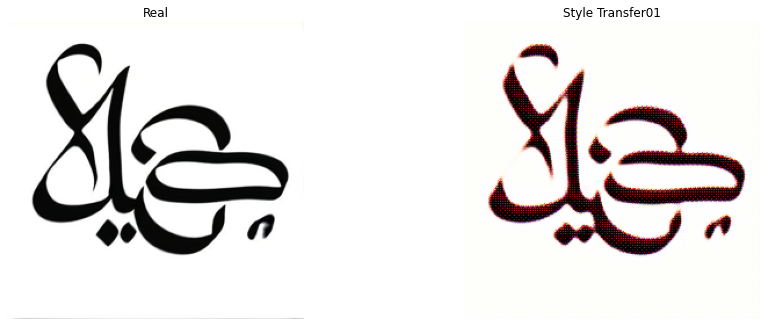

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer01
#Rename 40_net_G_B.pth ---> latest_net_G.pth
#moved to styleTransfer10

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer01/test_latest/images/fakes000104_real.png')
img2 = plt.imread('./results/styleTransfer01/test_latest/images/fakes000104_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer01")


Text(0.5, 1.0, 'Style Transfer02')

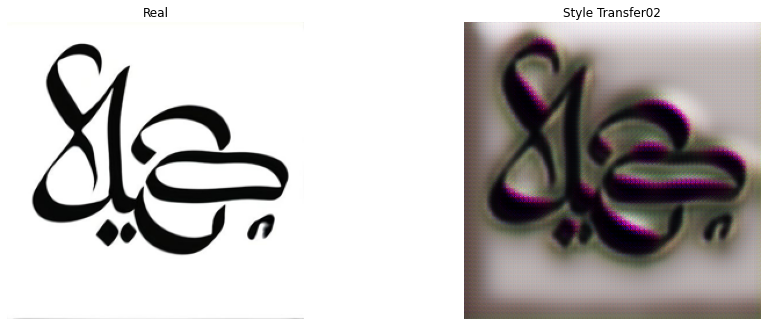

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer02
#Rename 40_net_G_A.pth ---> latest_net_G.pth
#moved to styleTransfer10

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer02/test_latest/images/fakes000104_real.png')
img2 = plt.imread('./results/styleTransfer02/test_latest/images/fakes000104_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer02")

Text(0.5, 1.0, 'Style Transfer03')

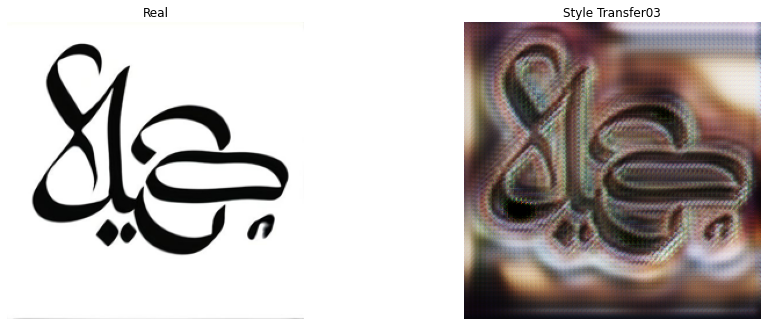

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer03
#Rename latest_net_G_A.pth ---> latest_net_G.pth

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer03/test_latest/images/fakes000104_real.png')
img2 = plt.imread('./results/styleTransfer03/test_latest/images/fakes000104_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer03")

Text(0.5, 1.0, 'Style Transfer04')

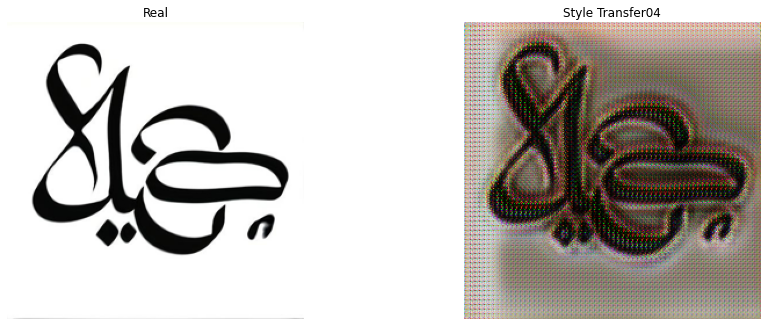

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer04
#Rename 10_net_G_A.pth ---> latest_net_G.pth

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer04/test_latest/images/fakes000104_real.png')
img2 = plt.imread('./results/styleTransfer04/test_latest/images/fakes000104_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer04")

Text(0.5, 1.0, 'Style Transfer05')

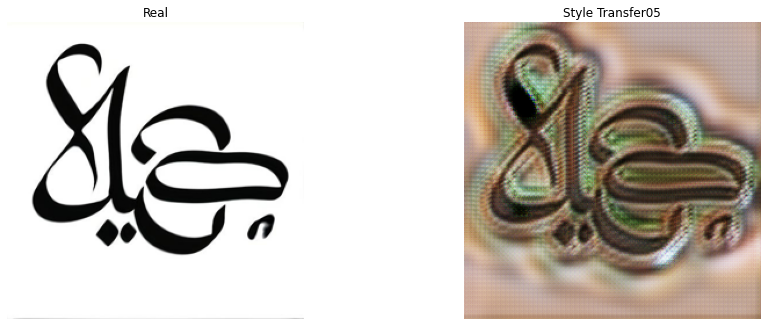

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer05
#Rename 100_net_G_A.pth ---> latest_net_G.pth

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer05/test_latest/images/fakes000104_real.png')
img2 = plt.imread('./results/styleTransfer05/test_latest/images/fakes000104_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer05")

Text(0.5, 1.0, 'Style Transfer051')

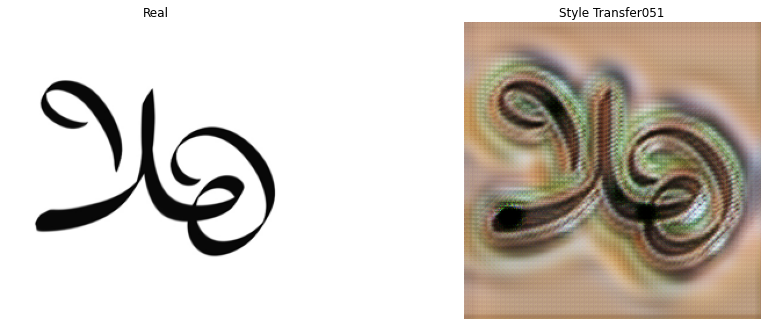

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer051
#copy of styleTransfer05 but on different dataset

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer051/test_latest/images/real0002_real.png')
img2 = plt.imread('./results/styleTransfer051/test_latest/images/real0002_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer051")

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer06
#Rename 95_net_G_A.pth ---> latest_net_G.pth
##dataroot is testB

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer06/test_latest/images/flickr_dog_000009_real.png')
img2 = plt.imread('./results/styleTransfer06/test_latest/images/flickr_dog_000009_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer06")

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer07
#Rename 105_net_G_A.pth ---> latest_net_G.pth
##dataroot is testB

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer07/test_latest/images/flickr_dog_000009_real.png')
img2 = plt.imread('./results/styleTransfer07/test_latest/images/flickr_dog_000009_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer07")

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer08
#Rename styleTransfer03 pth
##dataroot is testB

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer08/test_latest/images/flickr_dog_000009_real.png')
img2 = plt.imread('./results/styleTransfer08/test_latest/images/flickr_dog_000009_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer07")

In [ ]:
#styleTransfer09
#add latest_net_G_A.pth & latest_net_G_B
#model cycle_gan
#dataroot remove testA

!python test.py --dataroot datasets/CycleGAN_Dataset_R/ --name styleTransfer09 --model cycle_gan --no_dropout

Text(0.5, 1.0, 'Style Transfer09')

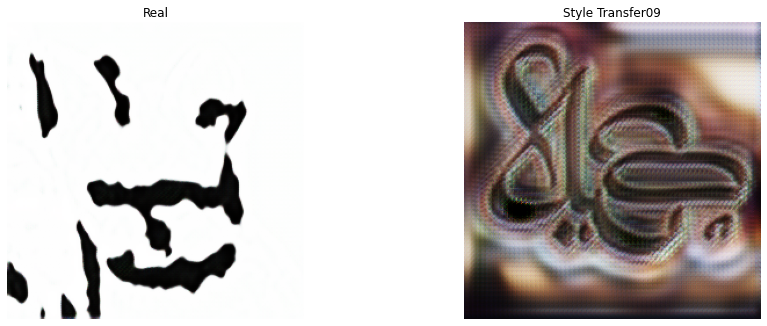

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer09
#add latest_net_G_A.pth & latest_net_G_B
#model cycle_gan

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer09/test_latest/images/fakes000104_fake_A.png')
img2 = plt.imread('./results/styleTransfer09/test_latest/images/fakes000104_fake_B.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer09")

In [ ]:
#styleTransfer10
#Rename 40_net_G_A.pth ---> latest_net_G.pth

!python test.py --dataroot datasets/CycleGAN_Dataset_R/ --name styleTransfer10 --model cycle_gan --no_dropout

Text(0.5, 1.0, 'Real B')

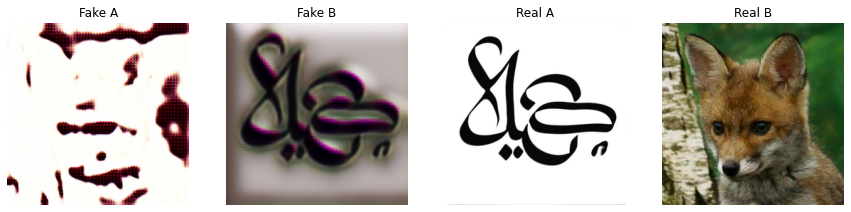

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer10
#model cycle_gan

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 4

img = plt.imread('./results/styleTransfer10/test_latest/images/fakes000104_fake_A.png')
img2 = plt.imread('./results/styleTransfer10/test_latest/images/fakes000104_fake_B.png')
img3 = plt.imread('./results/styleTransfer10/test_latest/images/fakes000104_real_A.png')
img4 = plt.imread('./results/styleTransfer10/test_latest/images/fakes000104_real_B.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Fake A")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Fake B")

fig.add_subplot(rows, columns, 3)

plt.imshow(img3)
plt.axis('off')
plt.title("Real A")

fig.add_subplot(rows, columns, 4)

plt.imshow(img4)
plt.axis('off')
plt.title("Real B")

In [ ]:
!python test.py --dataroot datasets/testData/ --name styleTransfer051 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/testData/            	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
!python test.py --dataroot datasets/testData/ --name styleTransfer06Test --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/testData/            	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
!python test.py --dataroot datasets/testData/ --name styleTransfer09Test --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/testData/            	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
!python test.py --dataroot datasets/testData/ --name styleTransfer09Test2 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/testData/            	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Text(0.5, 1.0, 'Style Transfer09')

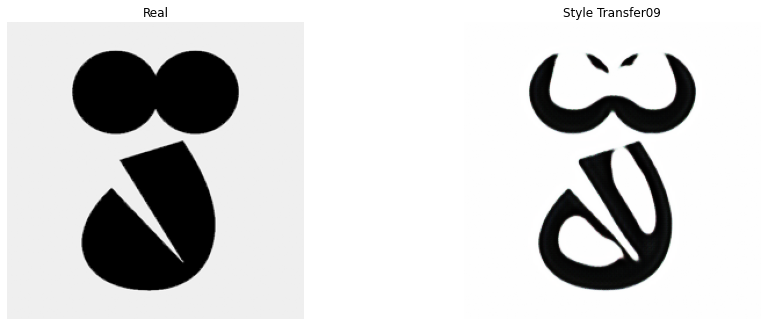

In [ ]:
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

#styleTransfer09Test2
#add latest_net_G_A.pth & latest_net_G_B
#model cycle_gan

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer09Test2/test_latest/images/test10_real.png')
img2 = plt.imread('./results/styleTransfer09Test2/test_latest/images/test10_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer09")

Text(0.5, 1.0, 'Style Transfer06')

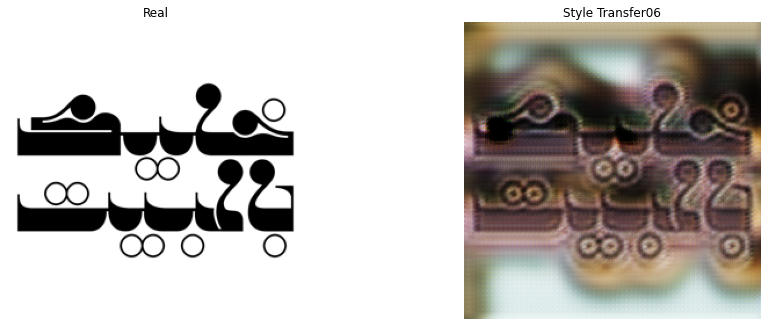

In [ ]:
#styleTransfer06Test

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer06Test/test_latest/images/test4_real.png')
img2 = plt.imread('./results/styleTransfer06Test/test_latest/images/test4_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Real")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer06")

In [ ]:
!cd /content

In [ ]:
#Source: https://kanoki.org/2021/05/11/show-images-in-grid-inside-jupyter-notebook-using-matplotlib-and-numpy/

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


def img_reshape(img):
    img = Image.open(f'/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/styleTransfer06Test/test_latest/images/{img}').convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

images = os.listdir('/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/styleTransfer06Test/test_latest/images/')
img_arr = []

for image in images:
  img_arr.append(img_reshape(image))

np.array(img_arr).shape


(18, 300, 300, 3)

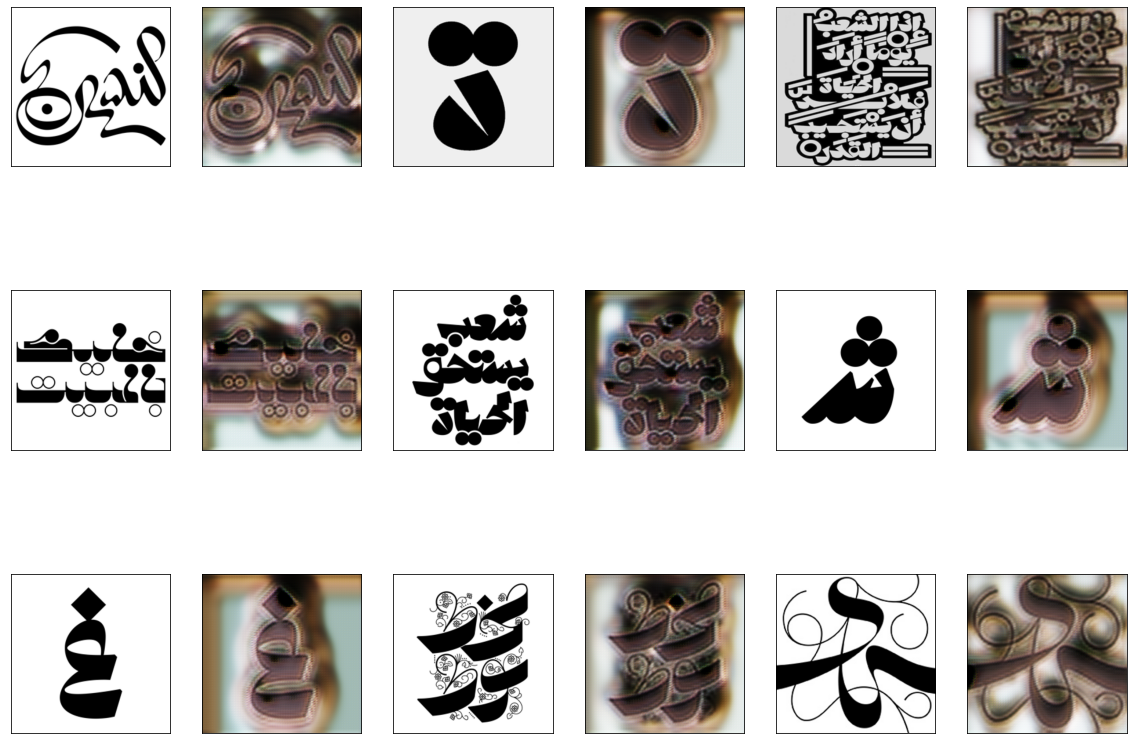

In [ ]:
#Source: https://colab.research.google.com/github/jasper-zheng/colab-snippets/blob/main/aw_code_snippets.ipynb#scrollTo=h5RmA9ywA4a-

plt.figure(figsize=(20,20))
for i in range(18):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(img_arr)[i])
plt.show()

In [ ]:
#Source: Week5 DCGAN Notebook

# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-qwlw5zq7
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-qwlw5zq7
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179884 sha256=7d20b09ab39266846dd46233095da67d411e7430c3c290bd59020b9b2ee9d600
  Stored in directory: /tmp/pip-ephem-wheel-cache-751g6o42/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
#Source: https://colab.research.google.com/github/jasper-zheng/colab-snippets/blob/main/aw_code_snippets.ipynb#scrollTo=h5RmA9ywA4a-

!ffmpeg -framerate 24 -i np.array(img_arr)[i] /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/video/output.mp4

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ffmpeg -framerate 24 -i np.array(img_arr)[i] /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/video/output.mp4'


Saving 428-4286616_decorative-line-png-transparent-background-calligraphy-silhouette-png.png to 428-4286616_decorative-line-png-transparent-background-calligraphy-silhouette-png.png


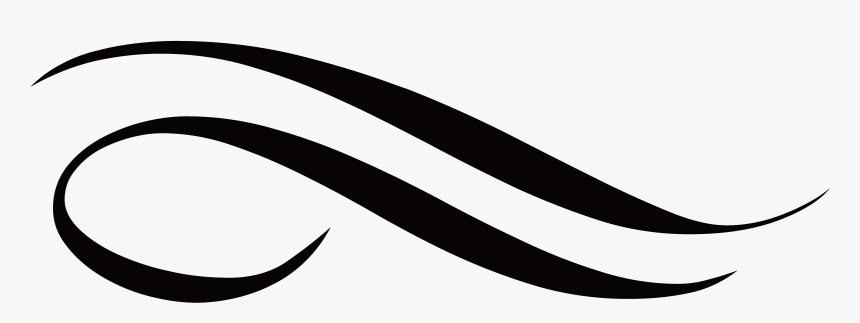

In [ ]:
#@title Upload An Image [PNG Only] { display-mode: "form" }
#Source: https://colab.research.google.com/drive/1AG19IKJ_J28-LjjOo2ntY1uLsMDHEuAs#scrollTo=N2RBLT6rYBAJ

from google.colab import files
from io import BytesIO

def img_from_local():
  uploaded = files.upload()
  filename = list(uploaded)[0]
  return BytesIO(uploaded[filename])

img_local = Image.open(img_from_local())
img_local.save('/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/datasets/UserImages/uploaded.png','PNG')
img_local

In [ ]:
#@title Style Transfer your Image { display-mode: "form" }
!pip install dominate &> /dev/null
!python test.py --dataroot datasets/UserImages/ --name userImages --model test --no_dropout &> /dev/null

Text(0.5, 1.0, 'Style Transfer')

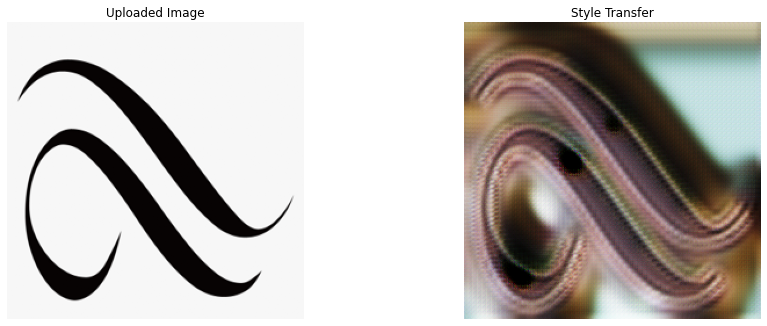

In [ ]:
#@title Display New Image { vertical-output: true, display-mode: "form" }
#Uploaded Images

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/userImages/test_latest/images/uploaded_real.png')
img2 = plt.imread('./results/userImages/test_latest/images/uploaded_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer")